In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.optimize as optimization

In [8]:
input_frame = pd.read_csv("E1-3.2.csv")
# xi = x / (lambda * z)
input_frame["theta"]=np.arctan(input_frame["x"]*(500e-9)/0.25)
input_frame

,x,Amplitude,theta
0,-400000.000000,0.006700,-0.674741
1,-399919.991999,0.006659,-0.674643
2,-399839.983998,0.006619,-0.674546
3,-399759.975998,0.006578,-0.674448
4,-399679.967997,0.006538,-0.674351
...,...,...,...
9995,399679.967997,0.006538,0.674351
9996,399759.975998,0.006578,0.674448
9997,399839.983998,0.006619,0.674546
9998,399919.991999,0.006659,0.674643


In [22]:
def func(theta, a, b):
    return np.power(np.sin(a*theta)/(b*theta), 2)

In [23]:
popt, pcov = optimization.curve_fit(func, input_frame["theta"], input_frame["Amplitude"])

In [24]:
popt

array([15.35444319, 15.35788838])

In [25]:
A = popt[0] * (500e-9) / 0.25
B = popt[1] * (500e-9) / 0.25
x = np.linspace(-400000, 400000, 10000)
y = func(x, A, B)

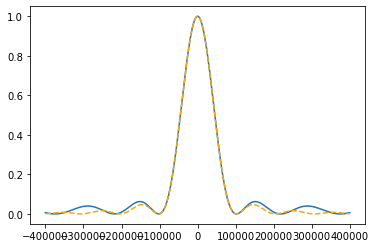

In [26]:
plt.plot(input_frame["x"], input_frame["Amplitude"])
plt.plot(x, y, color = "orange", linestyle = "dashed")

In [27]:
A

3.0708886371676954e-05

In [28]:
B

3.07157767589741e-05